### Exercises
frequencies:
- 1Hz
- 10Hz
- 30Hz
- 50Hz
- 100Hz
- 200Hz
- 500Hz
- 1000Hz


ta = 1s
fa = 5KHz

Butterworth (low-pass) - Show FFT for filtered and not filtered signal:
- 5Hz
- 20Hz
- 400Hz
- 700Hz

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def gen_signal(freq, A=1, phi=0):
    return A*np.sin(2*np.pi*freq*t + phi)


def plot_fft(y,title=None):
    """
    Plot fft for a given signal
    
    Adapted from: https://plot.ly/matplotlib/fft/
    """
    n = len(y) # length of the signal
    k = np.arange(n)
    T = n/fs
    frq = k/T # two sides frequency range
    frq = frq[:n//2] # one side frequency range

    Y = np.fft.fft(y)/(n/2) # fft computing and normalization
    Y = Y[:n//2]

    fig, ax = plt.subplots(2, 1, figsize=(15,4))

    time_lim = max(y)*1.1
    time_lim = 1 if time_lim < 1 else time_lim
    ax[0].plot(t,y, scaley=False)
    ax[0].set_xlabel('Time')
    ax[0].set_ylim([-time_lim, time_lim])
    ax[0].set_ylabel('Amplitude')
    if title:
        ax[0].set_title(title)

    freq_lim = max(abs(Y))*1.1
    freq_lim = 1 if freq_lim < 1 else freq_lim
    ax[1].plot(frq,abs(Y),'r', scaley=False) # plotting the spectrum
    ax[1].set_ylim([0, freq_lim])
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('|Y(freq)|')

seconds = 1
fs = 5000
t = np.arange(0, seconds, 1.0/fs)
filter_order = 8

# Desired frequencies vector
frequencies = [1, 10, 30, 50, 100, 200, 500, 1000]

# Cut-off frequencies
fc_vec = [5, 20, 400, 700]

sig = sum(gen_signal(f) for f in frequencies)

/home/yu/venvs/dsp/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


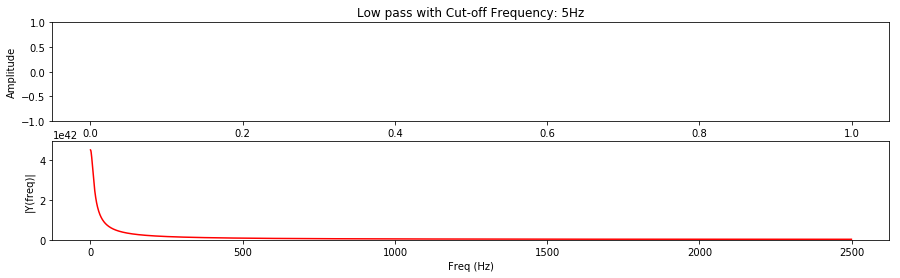

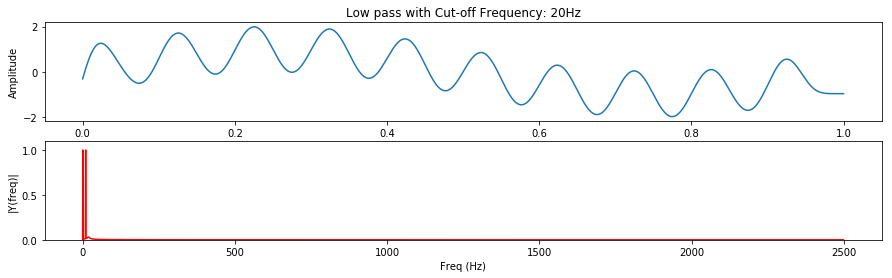

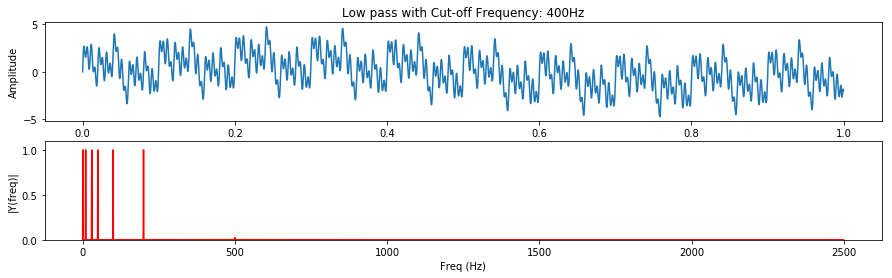

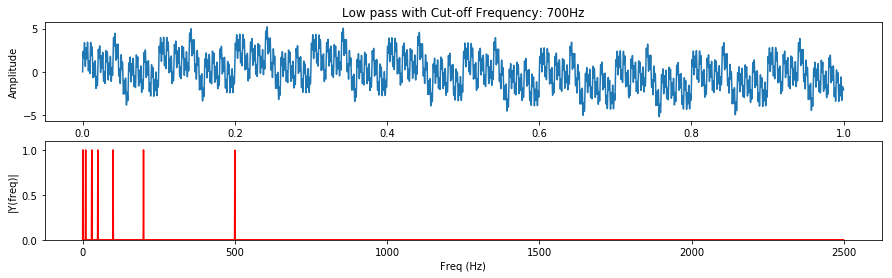

In [2]:
for fc in fc_vec:
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(filter_order, w, 'low')
    output = signal.filtfilt(b, a, sig)
    plot_fft(output, f'Low pass with Cut-off Frequency: {fc}Hz')